# Problem Statement
Given the increasing competition in the airline industry and the critical role customer bookings play in British Airways' revenue, accurately predicting customer booking behavior is essential for effective business planning and decision-making. This project aims to develop a machine learning model that can predict whether a customer will book a flight based on various factors such as customer preferences, past interactions, and flight details. The model will provide valuable insights to British Airways, helping them enhance their marketing strategies, personalize customer experiences, and optimize flight offerings, ultimately improving customer satisfaction and maximizing bookings.


- Data collection.                                                           
   The data for this project was provided by British airways.







In [ ]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('customer_booking.csv', encoding='iso-8859-1')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The following section provides a detailed explanation of each data column.¶
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking


In [ ]:
data.shape

(50000, 14)

In [ ]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Our data contains both categorical and numeric variables.

In [ ]:
#Have a quick look at the data
for column in data.columns:
  print(column)
  print(data[column].value_counts())
  print('-'*50)

num_passengers
num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64
--------------------------------------------------
sales_channel
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
--------------------------------------------------
trip_type
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
--------------------------------------------------
purchase_lead
purchase_lead
1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: count, Length: 470, dtype: int64
--------------------------------------------------
length_of_stay
length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: count, Length: 335, dtype: int64
--------------------------------------------------
fligh

In [ ]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Wow...no missing value

In [ ]:
data.duplicated().sum()

719

In [ ]:
#dropping the duplicated columns
data.drop_duplicates(inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
sales_channel,49281,2,Internet,43917
trip_type,49281,3,RoundTrip,48779
flight_day,49281,7,Mon,7988
route,49281,799,AKLKUL,2620
booking_origin,49281,104,Australia,17691


In [ ]:
data.apply(lambda x: len(x.unique()))

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

# EXPLORATORY DATA ANALYSIS

We are going to have a deep dive into both the numerical and categorical variables in this dataset

In [ ]:
Numerical_columns = [cname for cname in data.columns if data[cname].dtype in ['int64','float64'] and cname not in ['booking_complete']]
Categorical_columns = [cname for cname in data.columns if data[cname].dtype == 'object']
print('Numerical columns:',Numerical_columns)
print('-'*30)
print('Categorical columns:',Categorical_columns)

Numerical columns: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
------------------------------
Categorical columns: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


## Numerical features

### Purchase Lead Variable

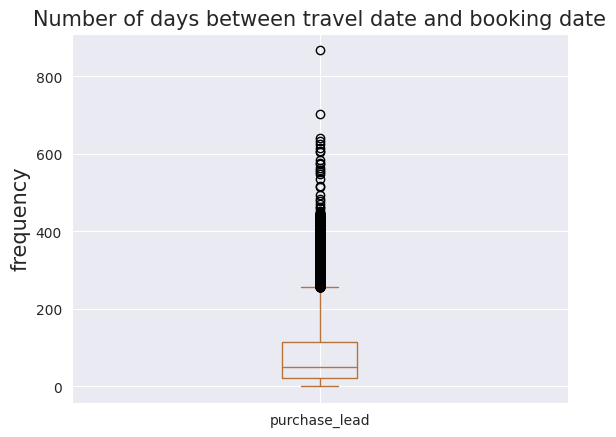

In [ ]:
data['purchase_lead'].plot(kind='box',color = '#b87339')
plt.title('Number of days between travel date and booking date',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

There are  outliers  between 356 and 867 days between travel and booking date. Further investigation is required as the airlines normally do not release flights for booking more than a year in advance. Actually, custumers might not even be able to book a flight two years out.

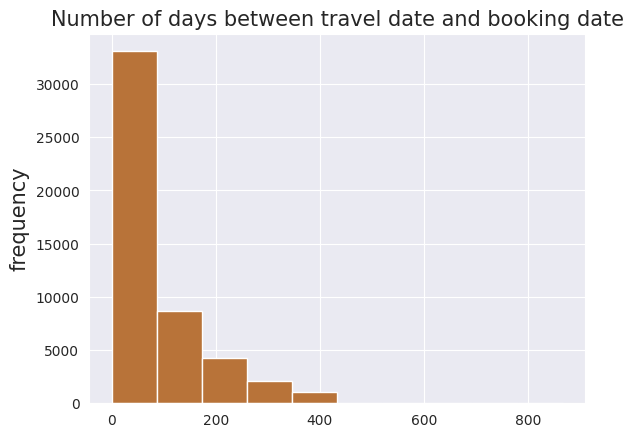

In [ ]:
data['purchase_lead'].plot(kind='hist',color = '#b87339')
plt.title('Number of days between travel date and booking date',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

The distribution is positively skewed (or right skewed). This means most values are clustered around the left tail.

### Flight Hour Variable

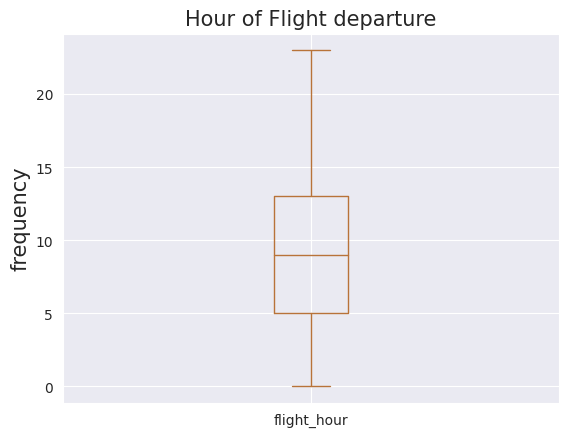

In [ ]:
data['flight_hour'].plot(kind='box',color = '#b87339')
plt.title('Hour of Flight departure',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

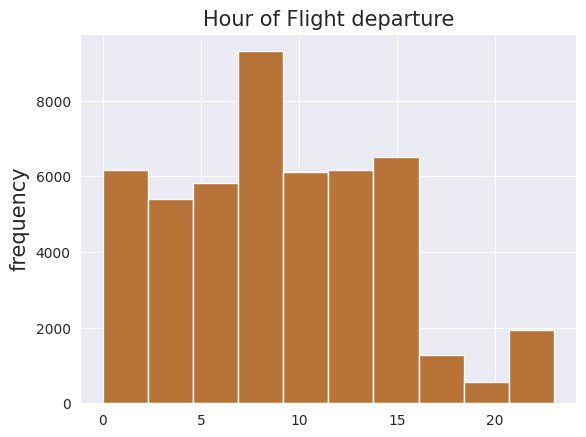

In [ ]:
data['flight_hour'].plot(kind='hist',color = '#b87339')
plt.title('Hour of Flight departure',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

The data is not normally distributed. There are no outliers present. Most flights depart in the morning, with an average departure time of 9 am.

### flight_duration variable

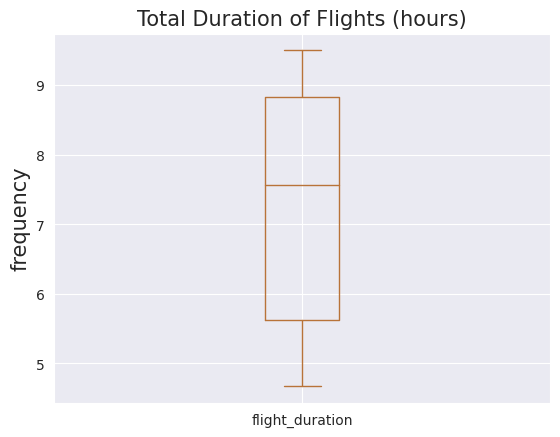

In [ ]:
data['flight_duration'].plot(kind='box',color = '#b87339')
plt.title('Total Duration of Flights (hours)',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

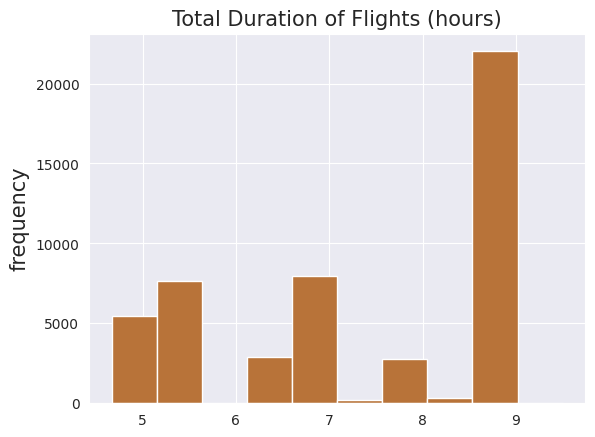

In [ ]:
data['flight_duration'].plot(kind='hist',color = '#b87339')
plt.title('Total Duration of Flights (hours)',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

The plot shows that the data does not follow a normal distribution. However, there are no outliers. 9 hours is the most popular flight duration based on flight data.

### Length of Stay Variable

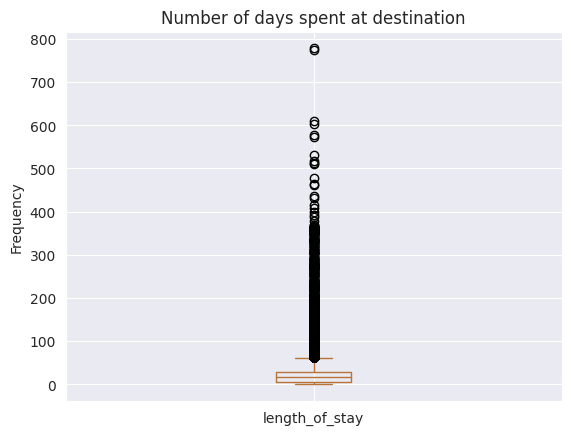

In [ ]:
data['length_of_stay'].plot(kind = 'box', color = '#b87339')
plt.title('Number of days spent at destination', fontsize = 12)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

Outliers detected between 60 and 778 require further investigation

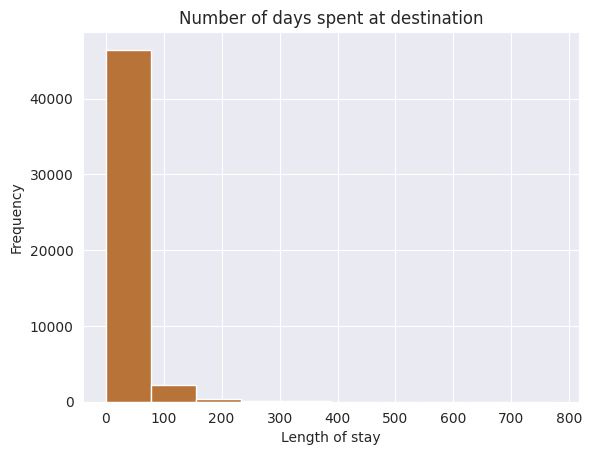

In [ ]:
data['length_of_stay'].plot(kind = 'hist', color = '#b87339')
plt.title('Number of days spent at destination', fontsize = 12)
plt.xlabel('Length of stay', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

A positive skew was observed in the distribution of the variable, which deviates from normality. This means, most data points are concentrated on the left side of the distribution.

## Outlier Analysis

In [ ]:

# Calculate the first and third quartiles
Q1 = data['length_of_stay'].quantile(0.25)
Q3 = data['length_of_stay'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper and lower whiskers using a different factor
factor = 0.5  # Adjust this factor as needed
upper_whisker = Q3 + factor * IQR
lower_whisker = Q1 - factor * IQR

# Filter the data to remove outliers
filtered_data = data[(data['length_of_stay'] <= upper_whisker) & (data['length_of_stay'] >= lower_whisker)]


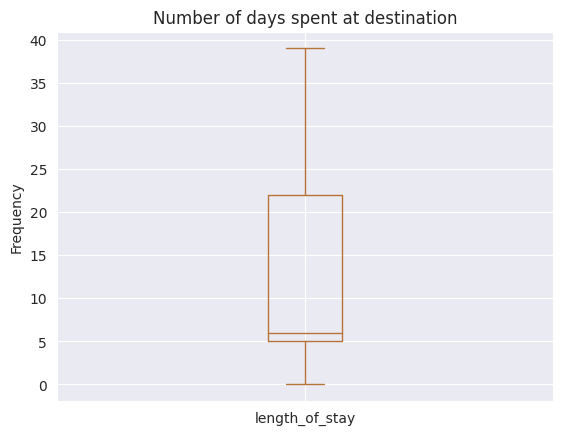

In [ ]:
filtered_data['length_of_stay'].plot(kind = 'box', color = '#b87339')
plt.title('Number of days spent at destination', fontsize = 12)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

This looks much better now.

In [ ]:
# Calculate the first and third quartiles
Q1 = filtered_data['purchase_lead'].quantile(0.25)
Q3 = filtered_data['purchase_lead'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper and lower whiskers using a different factor
factor = 5 # Adjust this factor as needed
upper_whisker = Q3 + factor * IQR
lower_whisker = Q1 - factor * IQR

# Filter the data to remove outliers
Data = filtered_data[(filtered_data['purchase_lead'] <= upper_whisker) & (filtered_data['purchase_lead'] >= lower_whisker)]


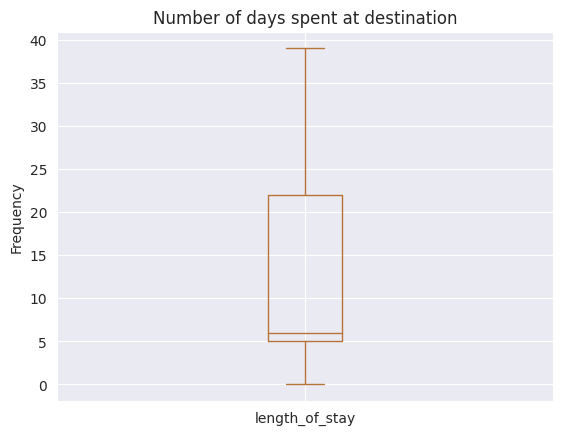

In [ ]:
Data['length_of_stay'].plot(kind = 'box', color = '#b87339')
plt.title('Number of days spent at destination', fontsize = 12)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

# Categorical features



Categorical columns: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']

**Sales channel**

In [ ]:
Data['sales_channel'].value_counts()

sales_channel
Internet    37426
Mobile       4855
Name: count, dtype: int64

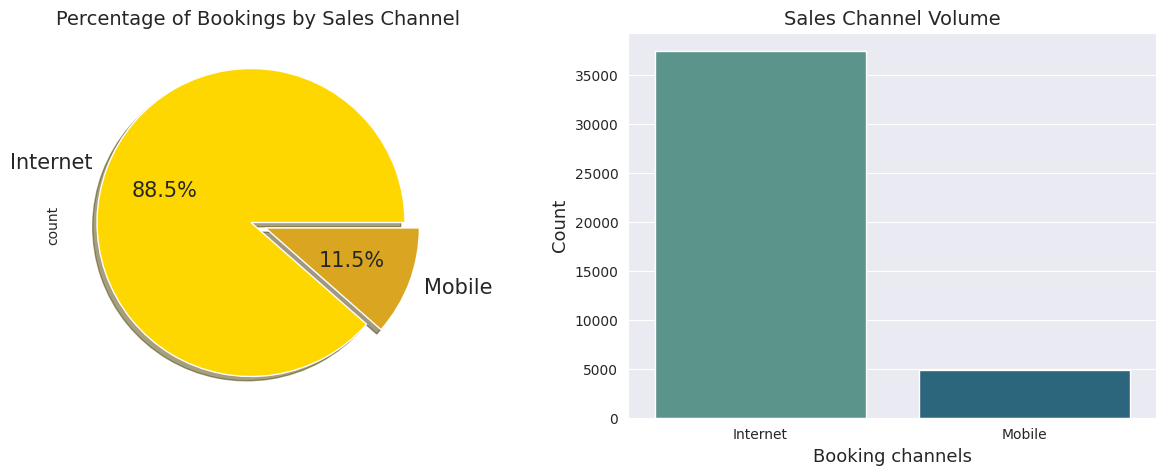

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart on ax[0]
Data['sales_channel'].value_counts().plot.pie(autopct='%1.1f%%',
                                              colors=['#ffd700', '#daa520'],
                                              explode=[0.05, 0.05],
                                              shadow=True,
                                              textprops={'fontsize': 15},
                                              ax=ax[0])
ax[0].set_title('Percentage of Bookings by Sales Channel', fontsize=14)

# Count plot on ax[1]
sns.countplot(x='sales_channel', data=Data, palette='crest', ax=ax[1])
ax[1].set_title('Sales Channel Volume', fontsize=14)
ax[1].set_xlabel('Booking channels', fontsize=13)
ax[1].set_ylabel('Count', fontsize=13)

plt.show()

We can come to a conclusion that most of the booking is done through the internet which 90% of the data.This significant imbalance in sales distribution suggests that the 'sales channel' variable might have limited predictive power in our model due to the lack of variation.



**Trip type**

In [ ]:
Data['trip_type'].value_counts()

trip_type
RoundTrip     41824
OneWay          357
CircleTrip      100
Name: count, dtype: int64

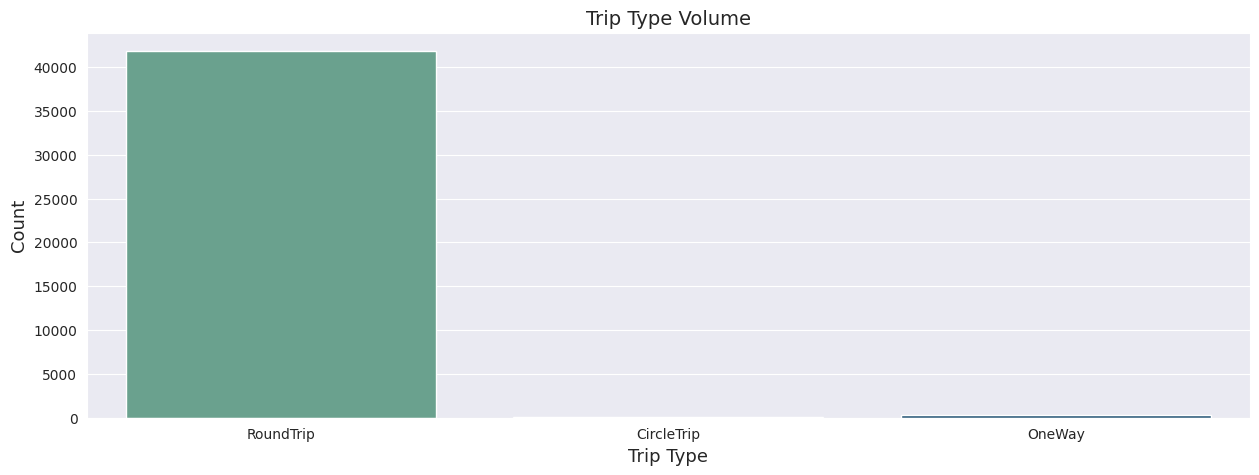

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='trip_type',data=Data,palette='crest')
plt.title('Trip Type Volume',fontsize=14)
plt.xlabel('Trip Type',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()

The most popular trip type leans heavily towards round trips, with a clear dominance of 48779 bookings compared to 386 one-way trips and 116 circle trips. This unbalanced distribution suggests that the variable might have limited predictive power in our model. Since round trips are the overwhelming choice, it may not provide enough variation to significantly influence our predictions.



**flight day**

In [ ]:
Data['flight_day'].value_counts()

flight_day
Mon    6887
Tue    6483
Wed    6467
Thu    6292
Fri    5682
Sun    5586
Sat    4884
Name: count, dtype: int64

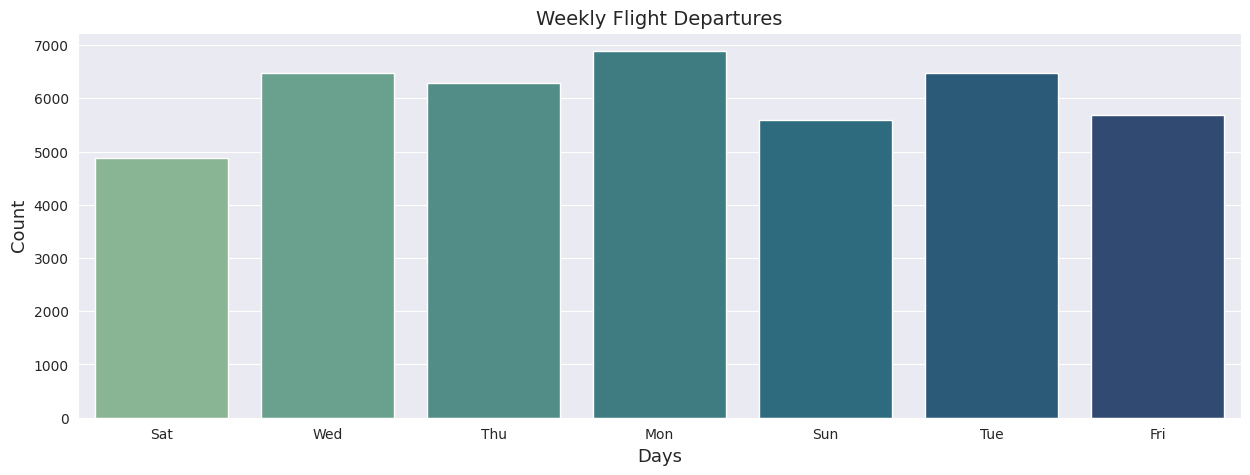

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='flight_day',data=Data,palette='crest')
plt.title('Weekly Flight Departures',fontsize=14)
plt.xlabel('Days',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()


Most flights depart on Mondays, while Saturdays see the fewest departures.

In [ ]:
mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
Data['flight_day_int'] = Data['flight_day'].map(mapping)
Data['flight_day_int'].value_counts()

flight_day_int
1    6887
2    6483
3    6467
4    6292
5    5682
7    5586
6    4884
Name: count, dtype: int64

**Route Variable**

The variable itself has low impact on the model. Hence, it can be removed from the model.

**Booking Origin Variable**

In [ ]:
Data['booking_origin'].value_counts()

booking_origin
Australia               14774
Malaysia                 5685
South Korea              4128
Japan                    3540
China                    3035
                        ...  
Egypt                       1
Lebanon                     1
Jordan                      1
Tanzania                    1
Svalbard & Jan Mayen        1
Name: count, Length: 101, dtype: int64

A duplicate country name was found: 'Czech Republic' and 'Czechia' refer to the same country.

While encoding the categorical variable 'booking_origin' with 104 unique country entries wouldn't be ideal for our analysis due to the large number of categories, converting them to broader regions like Asia, Africa, North America, South America, Antarctica, Europe, and Oceania can be beneficial. This process will reduce the number of categories.

However, it is important to note that there can be some variations in how continents are defined and grouped, particularly with regards to Europe and Asia (sometimes considered Eurasia) and Central America (sometimes grouped with North America).



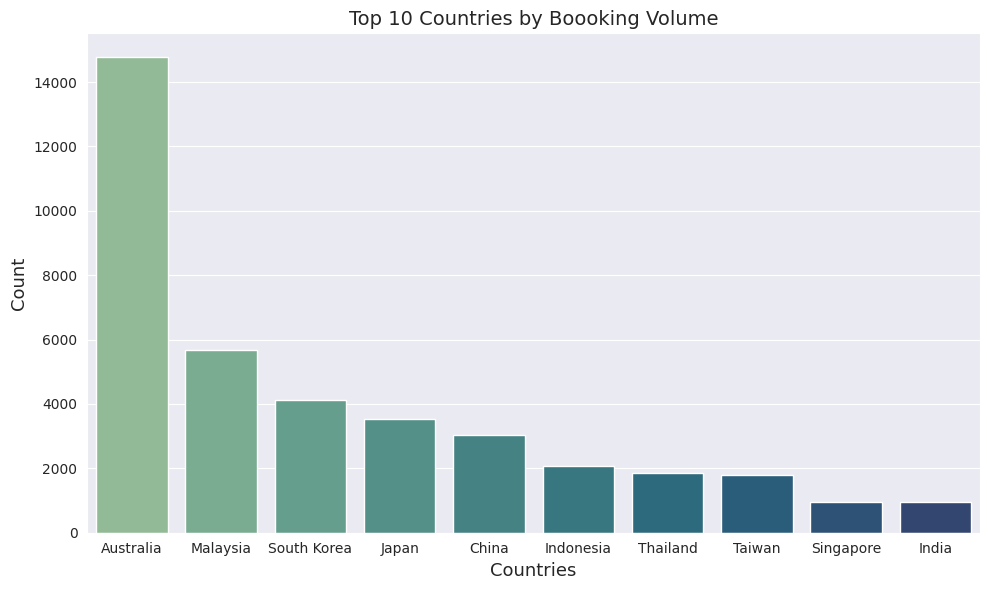

In [ ]:
top10 = Data['booking_origin'].value_counts().sort_values(ascending=False).head(10)
booking_origin_top10 = Data[Data['booking_origin'].isin(top10.index)]
plt.figure(figsize=(10, 6))
plots = sns.countplot(data=booking_origin_top10, x='booking_origin', palette='crest', order=top10.index)
plt.title('Top 10 Countries by Boooking Volume', fontsize = 14)
plt.xlabel('Countries', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.tight_layout()
plt.show()

According to the plot, Australia is the top country from where booking was made, followed by Malaysia and South Korea. It appears that Australia might be an important feature in our prediction model.



**Booking Continent Variable**


In [ ]:
continents = {'Australia': 'Oceania','Malaysia': 'Asia','South Korea': 'Asia','Japan': 'Asia','China': 'Asia','Indonesia': 'Asia','Taiwan': 'Asia','Thailand': 'Asia',
              'India': 'Asia','New Zealand': 'Oceania','Singapore': 'Asia','United States': 'North America','Vietnam': 'Asia','Macau': 'Asia','Hong Kong': 'Asia',
              'Philippines': 'Asia','United Kingdom': 'Europe','Brunei': 'Asia','Cambodia': 'Asia','(not set)': 'Unknown','Sri Lanka': 'Asia','Italy': 'Europe',
              'France': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 'Myanmar (Burma)': 'Asia', 'Netherlands': 'Europe', 'Mauritius': 'Africa',
              'United Arab Emirates': 'Asia','Nepal': 'Asia','Bangladesh': 'Asia','Saudi Arabia': 'Asia','Russia': 'Europe','Spain': 'Europe','Laos': 'Asia',
              'Switzerland': 'Europe','Chile': 'South America','Qatar': 'Asia','Iran': 'Asia','Sweden': 'Europe','Réunion': 'Africa','Mexico': 'South America',
              'Kuwait': 'Asia','Oman': 'Asia','Brazil': 'South America','Turkey': 'Asia','Mongolia': 'Asia','Austria': 'Europe','Poland': 'Europe',
              'Czech Republic': 'Europe','Finland': 'Europe','Ireland': 'Europe','Maldives': 'Asia','Denmark': 'Europe','Belgium': 'Europe','Greece': 'Europe',
              'Argentina': 'South America','New Caledonia': 'Oceania','Portugal': 'Europe','Ukraine': 'Europe','Norway': 'Europe','Bahrain': 'Asia','Peru': 'South America', 'Colombia': 'South America','Romania': 'Europe','South Africa': 'Africa','Kenya': 'Africa','Kazakhstan': 'Asia','Hungary': 'Europe',
              'Israel': 'Asia','Slovenia': 'Europe','Solomon Islands': 'Oceania','Guam': 'Oceania','Timor-Leste': 'Asia','Cyprus': 'Europe','Croatia': 'Europe',
              'Tunisia': 'Africa','Vanuatu': 'Oceania','Czechia': 'Europe','Malta': 'Europe','Gibraltar': 'Europe','Belarus': 'Europe','Pakistan': 'Asia',
              'Iraq': 'Asia','Ghana': 'Africa','Seychelles': 'Africa','Guatemala': 'North America','Algeria': 'Africa','Afghanistan': 'Asia','Lebanon': 'Asia',
              'Estonia': 'Europe','Paraguay': 'South America','Papua New Guinea': 'Oceania','Jordan': 'Asia','Egypt': 'Africa','Nicaragua': 'North America',
              'Slovakia': 'Europe','Norfolk Island': 'Oceania','Bhutan': 'Asia','Panama': 'North America','Tonga': 'Oceania',
              'Tanzania': 'Africa','Bulgaria': 'Europe','Svalbard & Jan Mayen': 'Europe'}
Data['booking_continent'] = Data['booking_origin'].map(continents)

In [ ]:
Data['booking_continent'].value_counts()

booking_continent
Asia             25572
Oceania          15601
Europe             491
North America      457
Unknown             67
Africa              54
South America       39
Name: count, dtype: int64

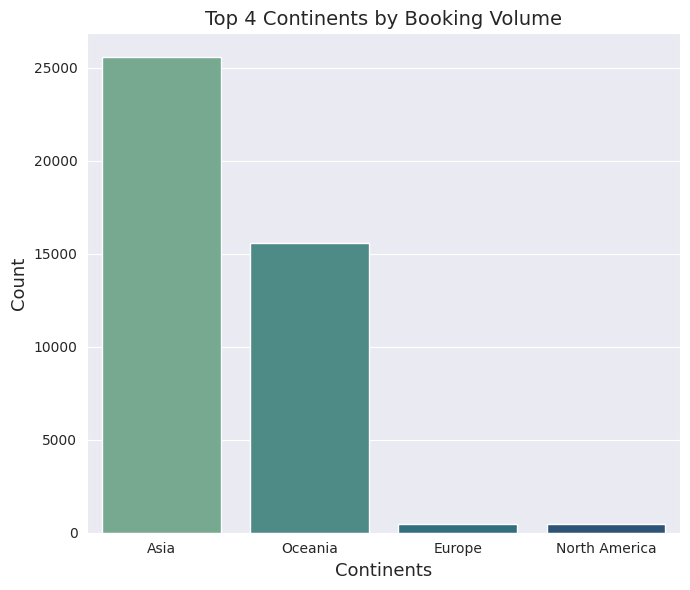

In [ ]:
#top4 = df['booking_continent'].value_counts(ascending=False).head(4)
top4 = Data['booking_continent'].value_counts().sort_values(ascending=False).head(4)
booking_origin_top4 = Data[Data['booking_continent'].isin(top4.index)]
plt.figure(figsize=(7, 6))
plots = sns.countplot(data=booking_origin_top4, x='booking_continent', palette='crest', order=top4.index)
plt.title('Top 4 Continents by Booking Volume', fontsize = 14)
plt.xlabel('Continents', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.tight_layout()
plt.show()


Based on the plot, Asia is the top continent from where booking was made, followed by Oceania, Europe and North America.

## Booking Complete

In [ ]:
Data['booking_complete'].value_counts()

booking_complete
0    35835
1     6446
Name: count, dtype: int64

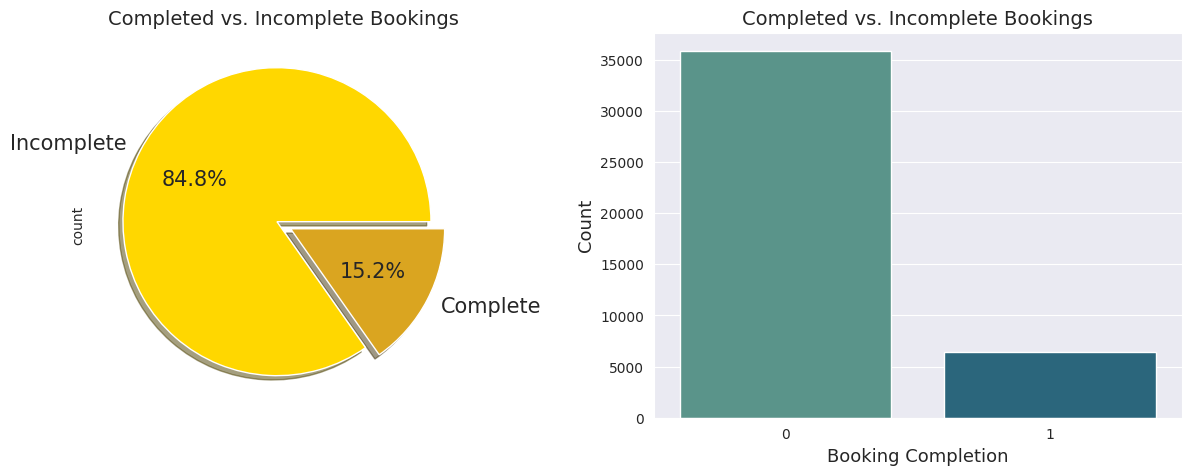

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart on ax[0]
labels = ['Incomplete', 'Complete']
Data['booking_complete'].value_counts().plot.pie(autopct='%1.1f%%',
                                              colors=['#ffd700', '#daa520'],
                                                 labels = labels,
                                              explode=[0.05, 0.05],
                                              shadow=True,
                                              textprops={'fontsize': 15},
                                              ax=ax[0])
ax[0].set_title('Completed vs. Incomplete Bookings', fontsize=14)

# Count plot on ax[1]
sns.countplot(x='booking_complete', data=Data, palette='crest', ax=ax[1])
ax[1].set_title('Completed vs. Incomplete Bookings', fontsize=14)
ax[1].set_xlabel('Booking Completion', fontsize=13)
ax[1].set_ylabel('Count', fontsize=13)

plt.show()

It is evident from the above plots that there is a high imbalance in the dataset as only 15% of customers finalised bookings for British Airways, while 85% did not. Class imbalance is a well-known challenge in machine learning. If left unaddressed, it can significantly impact model performance.



**Categorical Data vs Target**

In [ ]:
Categorical_Columns =['sales_channel', 'trip_type','flight_day',
                     'wants_extra_baggage','wants_preferred_seat', 'wants_in_flight_meals']

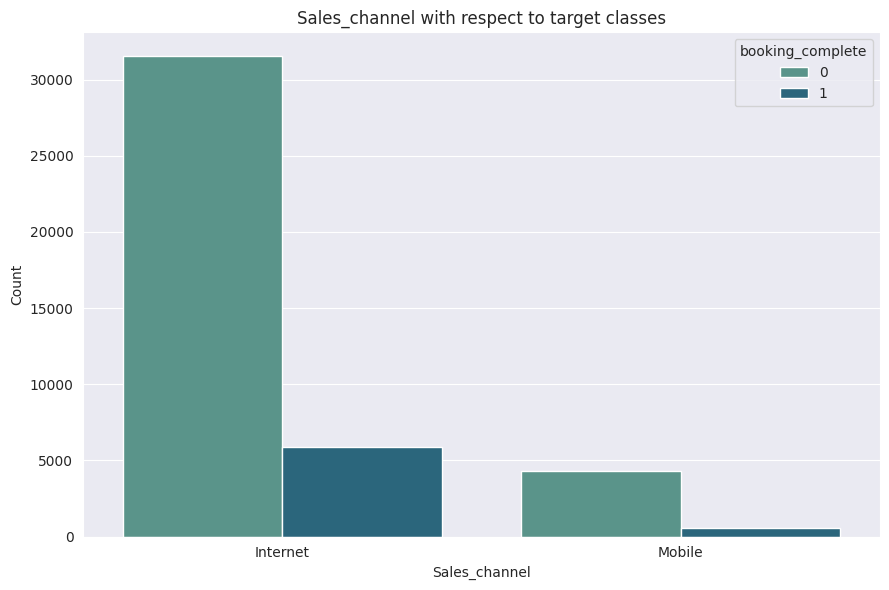

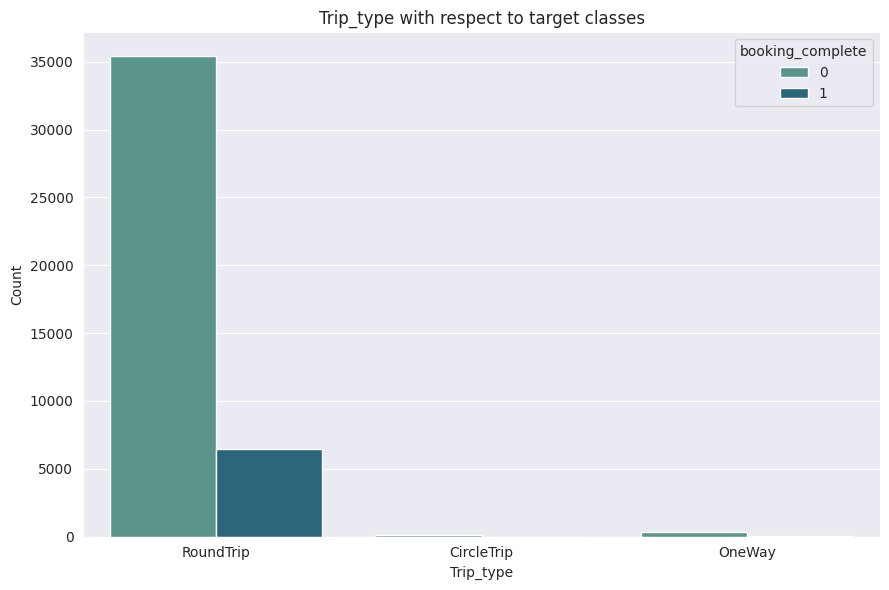

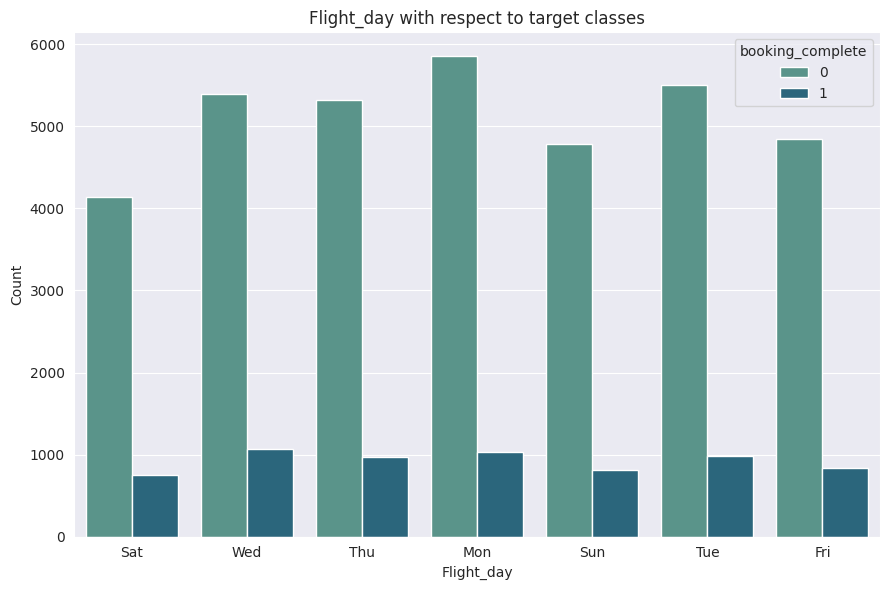

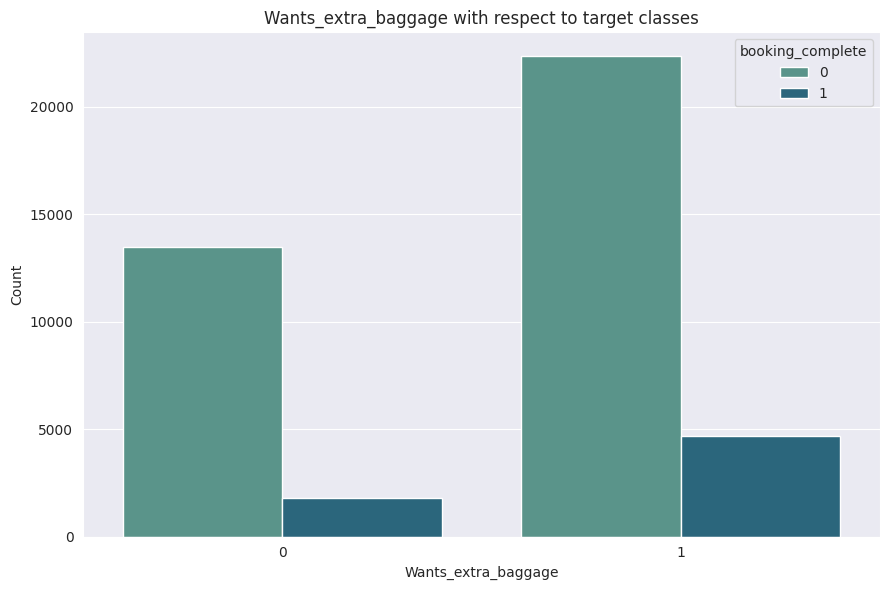

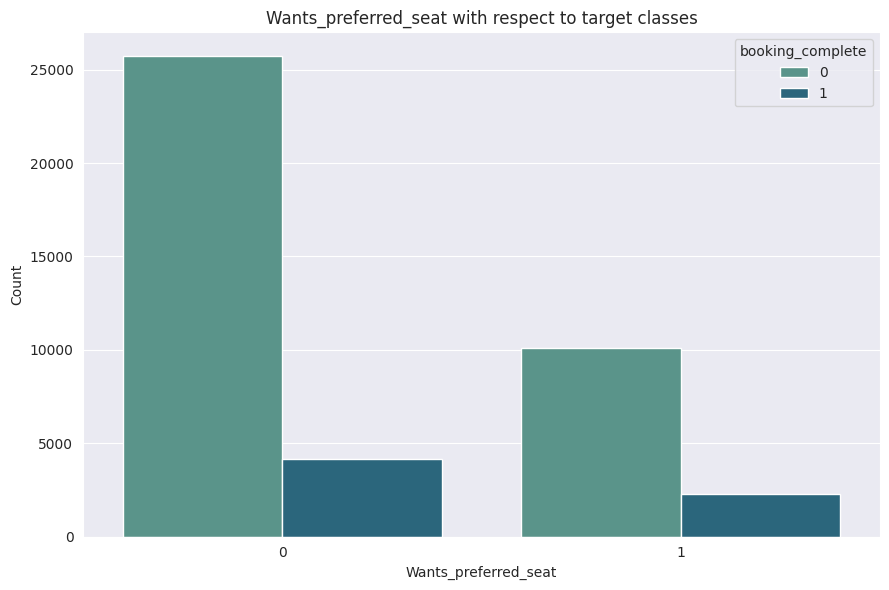

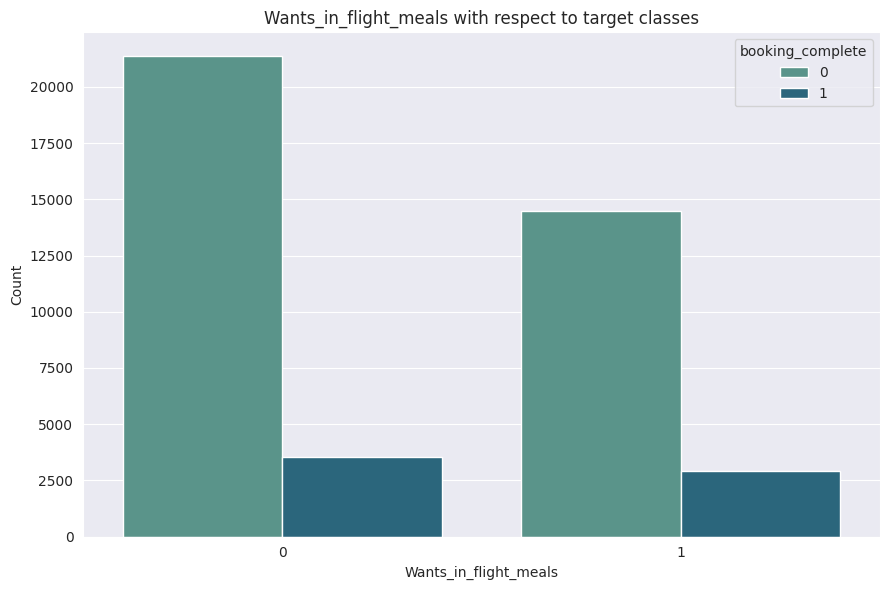

In [ ]:
for col in Categorical_Columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=Data, x=col, hue='booking_complete', palette='crest')
    plt.title(f"{col.capitalize()} with respect to target classes")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend(title='booking_complete')
    plt.xticks(rotation=0)
    plt.show()

**Brief explanation of the plot**
- Interestingly, the internet plays a prominent role in both completed bookings and those not finalised.
- Round trip bookings emerged as the clear favourite among customers who finalised their bookings and also those who did not.
- Completed bookings peak on Wednesdays and Mondays, suggesting a preference for weekday.In contrast, incomplete bookings are most frequent at the beginning of the week, with Mondays seeing the highest number, followed by Tuesdays and Wednesdays. Saturdays see the fewest incomplete bookings overall.
- The plot shows that passengers who want to add extra baggage have a higher booking completion rate compared to those who do not.
- The analysis reveals that customers who do not select a preferred seat have a higher booking completion rate compared to those who do. This might suggest that seat selection is not a major factor influencing booking completion for some customers.
- Customers who did not complete their bookings were more likely to skip selecting a meal altogether.



**Booking Completion vs. Number of Passengers**

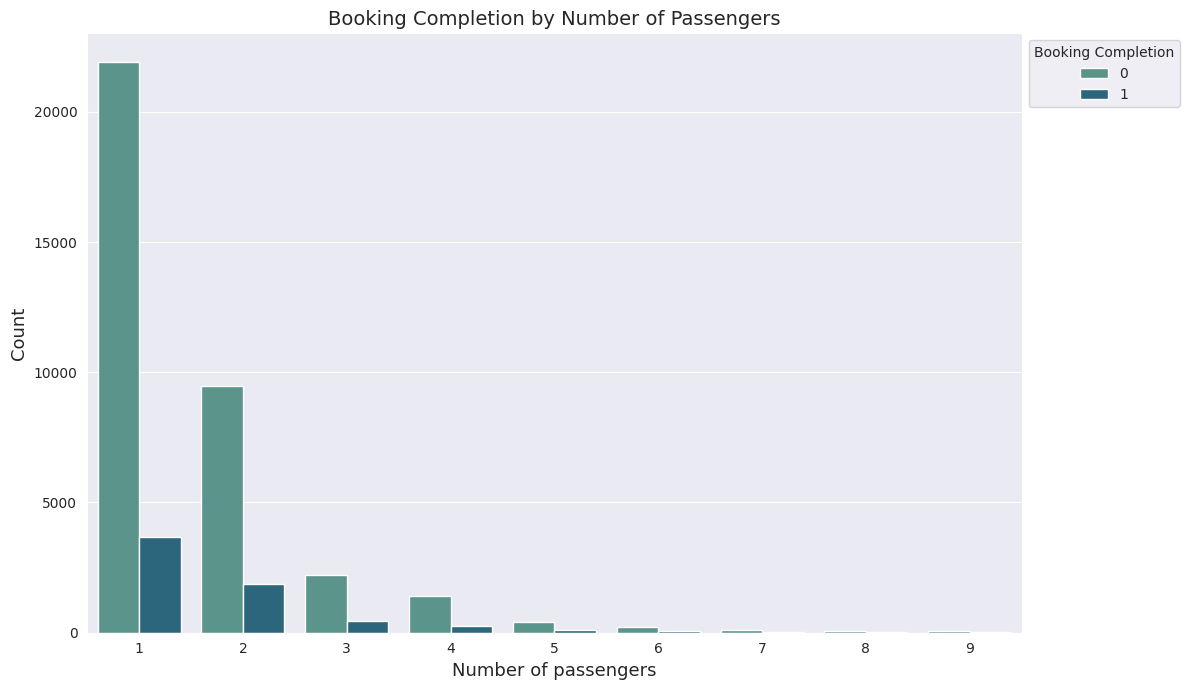

In [ ]:
plt.figure(figsize=(12,7))
plots = sns.countplot(data = Data, x = 'num_passengers', hue = 'booking_complete', palette = 'crest');
plt.title('Booking Completion by Number of Passengers', fontsize = 14)
plt.xlabel('Number of passengers', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.legend(title = 'Booking Completion', bbox_to_anchor = (1, 1), loc ='upper left')
plt.tight_layout()
plt.show()

The plot reveals an interesting trend: booking completions tend to decrease as the number of passengers per booking increases. For example, solo travelers have the highest volume of both completed and incomplete bookings. Conversely, bookings for groups of four or five have a significantly lower completion rate, and there are also fewer bookings for larger groups.

**Booking Completion vs. Flight Duration**

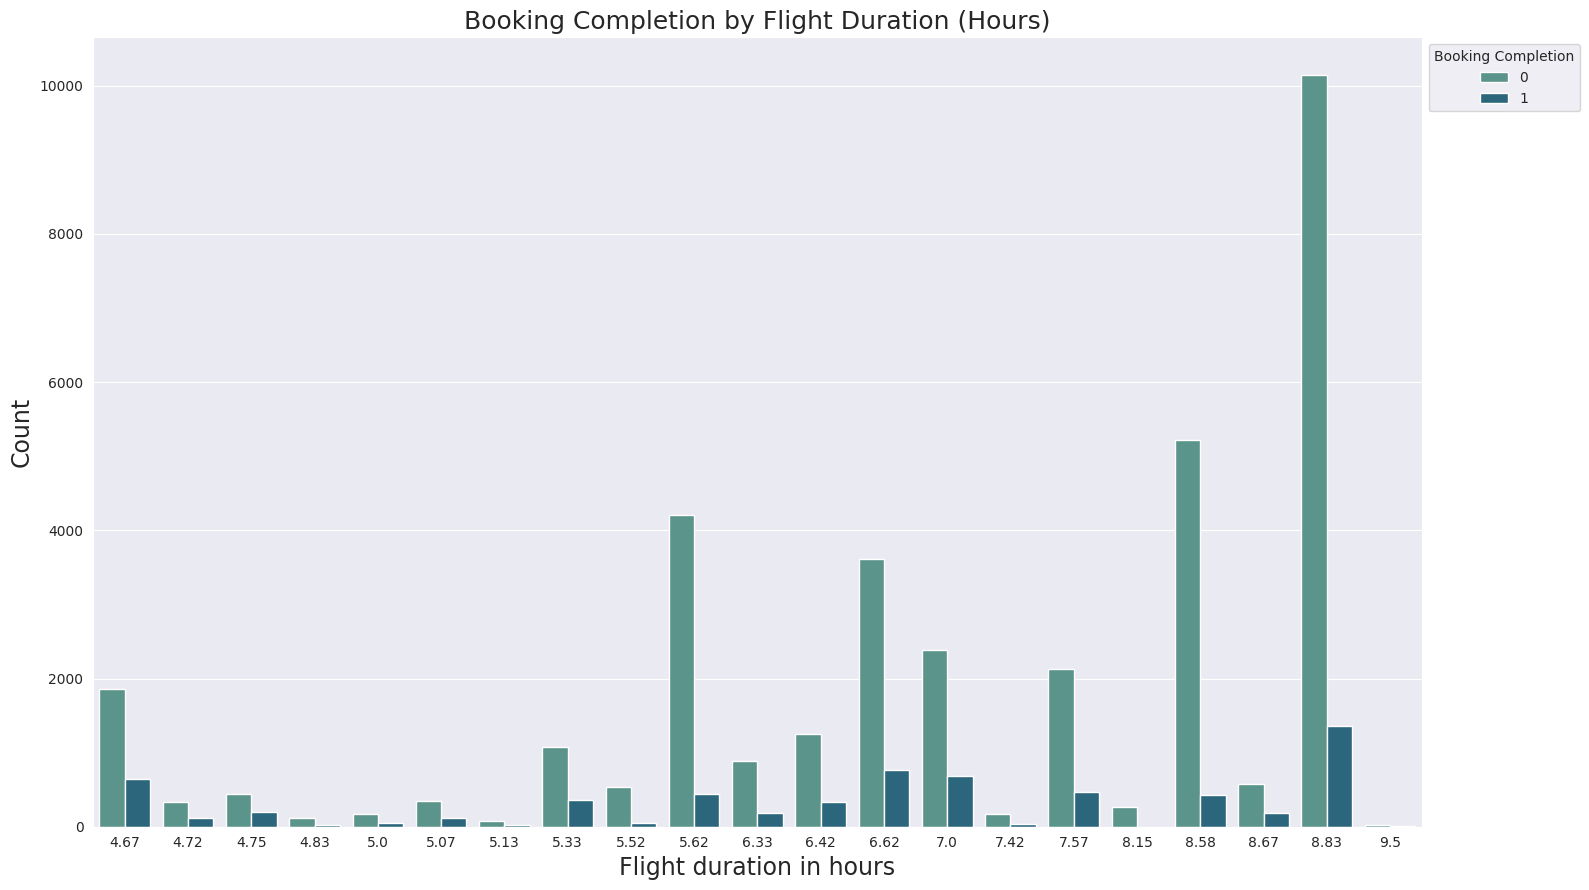

In [ ]:
plt.figure(figsize=(16,9))
splot = sns.countplot(data = Data, x = 'flight_duration', hue = 'booking_complete', palette = 'crest')
plt.title('Booking Completion by Flight Duration (Hours)', fontsize = 18)
plt.xlabel('Flight duration in hours', size = 17)
plt.ylabel('Count', size = 17)
plt.legend(title = 'Booking Completion', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

For completed bookings, there was not a significant difference in flight duration preferences. However, customers abandoning bookings showed a preference for flights around 8.7 hours.

In [ ]:
num_var = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
corr = Data[num_var].corr()
corr

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.211646,-0.108773,0.013917,0.147971,0.028272,0.026833,-0.067563,0.028222
purchase_lead,0.211646,1.000000,0.017647,0.030257,0.004355,-0.004650,-0.016696,0.063709,-0.017625
length_of_stay,-0.108773,0.017647,1.000000,-0.036050,0.234519,0.023626,0.113345,0.253719,-0.120724
flight_hour,0.013917,0.030257,-0.036050,1.000000,-0.006468,0.010189,0.010165,-0.010279,0.013621
wants_extra_baggage,0.147971,0.004355,0.234519,-0.006468,1.000000,0.214312,0.211936,0.061626,0.075262
wants_preferred_seat,0.028272,-0.004650,0.023626,0.010189,0.214312,1.000000,0.309432,0.090292,0.057849
wants_in_flight_meals,0.026833,-0.016696,0.113345,0.010165,0.211936,0.309432,1.000000,0.147567,0.035117
flight_duration,-0.067563,0.063709,0.253719,-0.010279,0.061626,0.090292,0.147567,1.000000,-0.103408
booking_complete,0.028222,-0.017625,-0.120724,0.013621,0.075262,0.057849,0.035117,-0.103408,1.000000


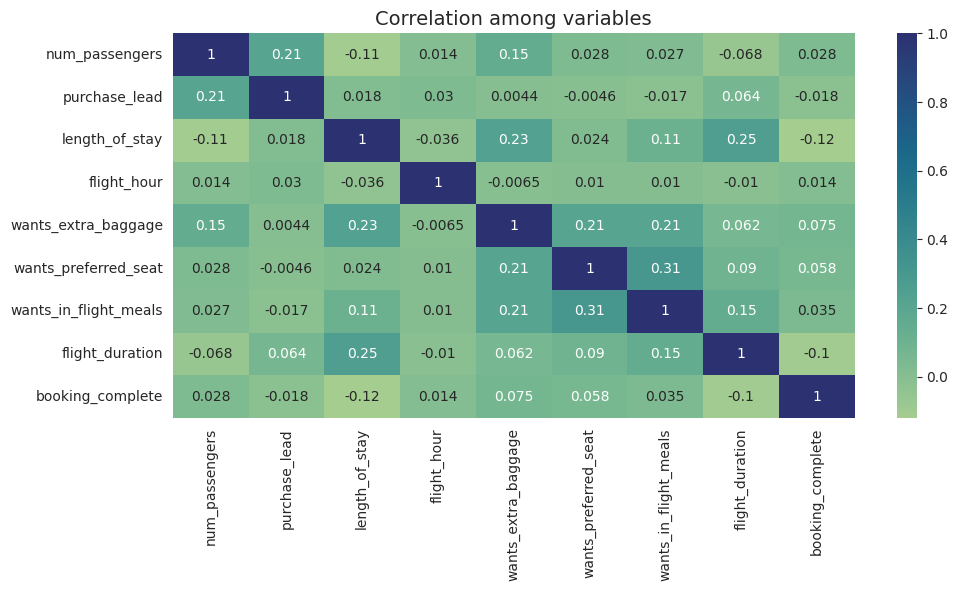

In [ ]:
plt.figure(figsize=(11, 5))
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation among variables', fontsize = 14)

plt.show()

- Passengers who opt for in-flight meals were more likely to also prefer selecting their seats beforehand (0.32). This suggests potential value in offering bundled deals or highlighting these options together during the booking process.

- A weak but positive correlation exists between wanting in-flight meals and choosing extra baggage (0.22). This might indicate travellers planning longer trips or seeking a more comfortable experience often select both options.

- Interestingly, a slight positive correlation emerged between the lead time for a purchase_lead and the number of passengers traveling together (0.21). This could suggest groups tend to plan trips further in advance compared to solo travelers.

It is important to note that the analysis revealed weak correlations between booking completion and the numerical features considered. This suggests booking completion is likely influenced by other factors. More features need to be added into the model and further investigation into these areas can provide a more comprehensive understanding of factors influencing booking completion.

In [ ]:
Data.shape

(42281, 16)

In [ ]:
Data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
flight_day_int           0
booking_continent        0
dtype: int64

In [ ]:
Data.to_csv('Customer_behavior',index=False)